## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import shuffle
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

## Data Pre-processing

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

In [8]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [11]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## Evaluation

In [12]:
y_pred = knn_model.predict(X_test)

In [13]:
metrics.accuracy_score(y_test,y_pred)

0.582089552238806

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[28,  4,  2],
       [ 8,  9,  6],
       [ 4,  4,  2]], dtype=int64)

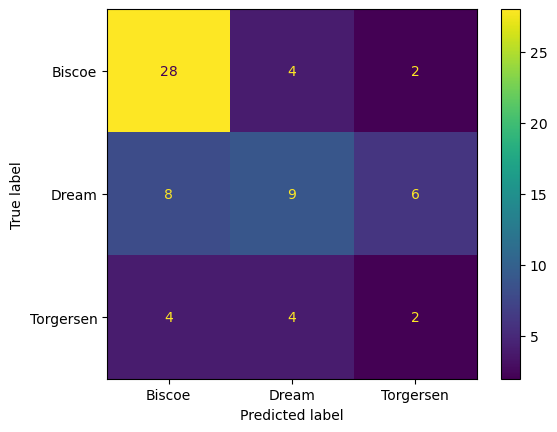

In [15]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=knn_model.classes_).plot()

In [16]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.70      0.82      0.76        34
       Dream       0.53      0.39      0.45        23
   Torgersen       0.20      0.20      0.20        10

    accuracy                           0.58        67
   macro avg       0.48      0.47      0.47        67
weighted avg       0.57      0.58      0.57        67



## Elbow method

In [17]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train) 
   
    y_pred_test = knn_model.predict(X_test)
    
    test_error = 1 - metrics.accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

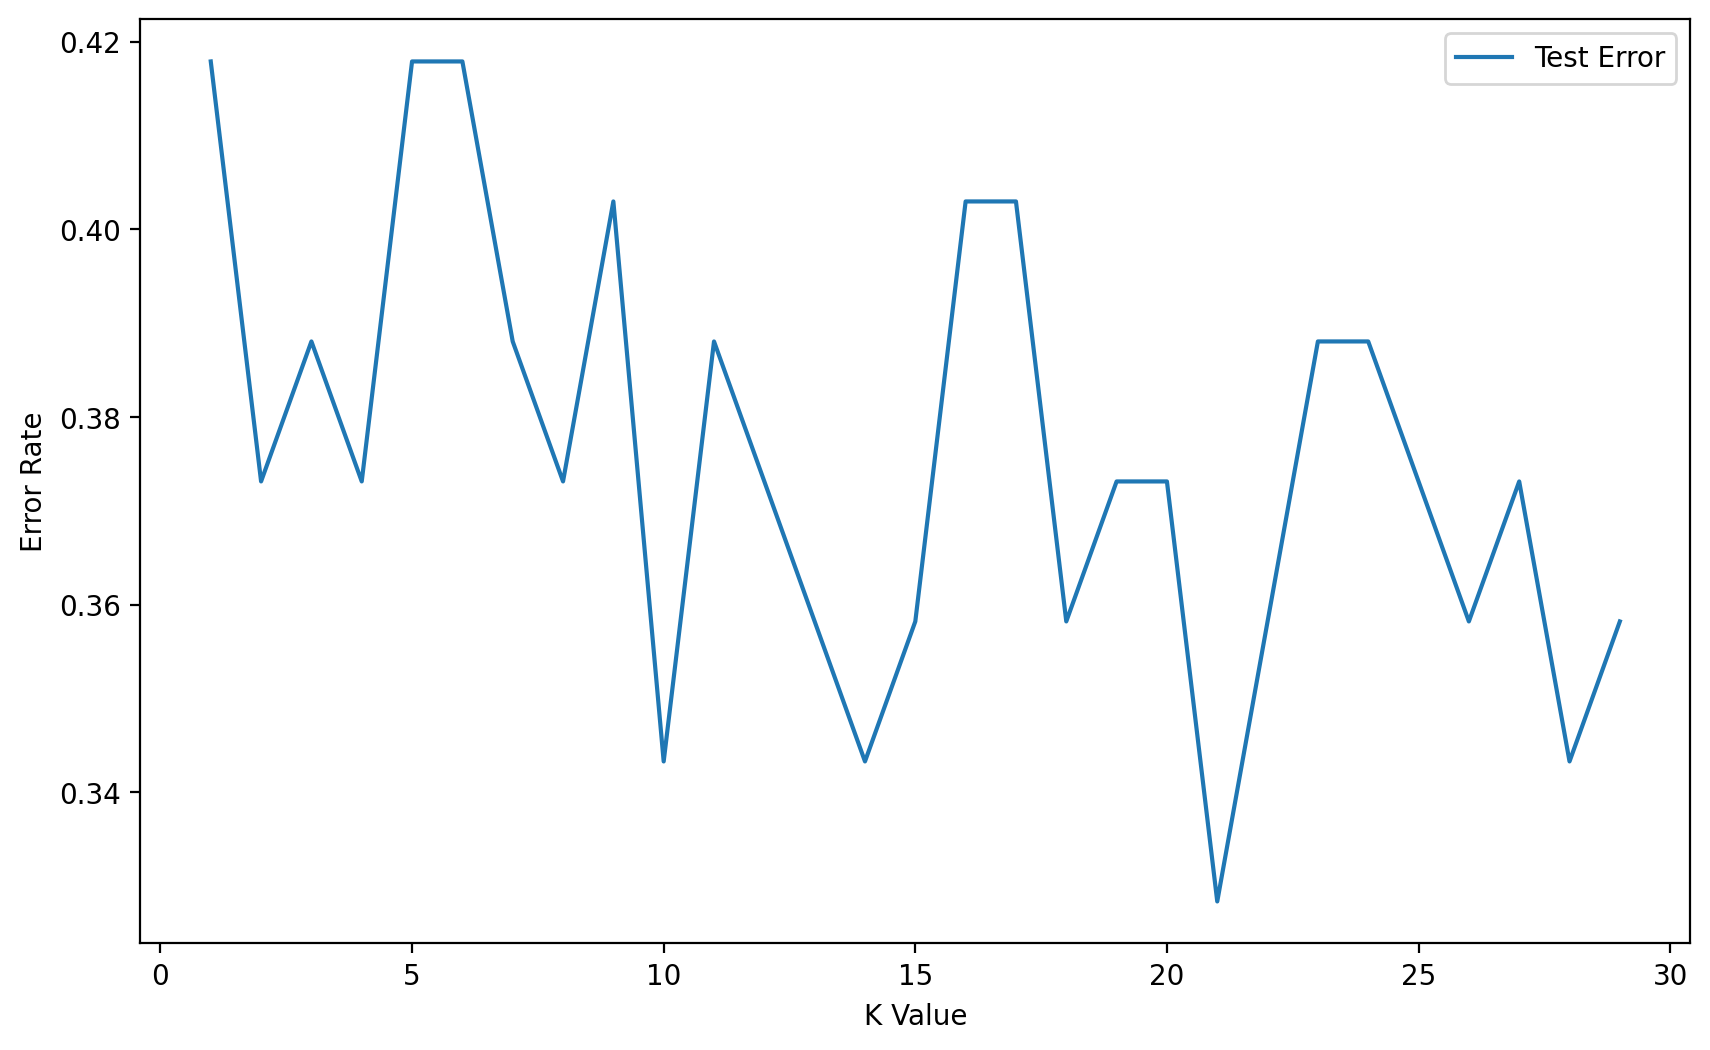

In [18]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

## Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_model = KNeighborsClassifier()

In [21]:
n_neighbors = np.linspace(1,30, 30).astype(int)

In [22]:
grid_model = GridSearchCV(knn_model,param_grid={'n_neighbors':n_neighbors}, cv = 5, scoring='accuracy')

In [23]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [24]:
grid_model.best_params_

{'n_neighbors': 18}

In [25]:
y_pred = grid_model.predict(X_test)

In [26]:
metrics.accuracy_score(y_test,y_pred)

0.6417910447761194

In [27]:
metrics.confusion_matrix(y_test,y_pred)

array([[25,  8,  1],
       [ 4, 18,  1],
       [ 2,  8,  0]], dtype=int64)

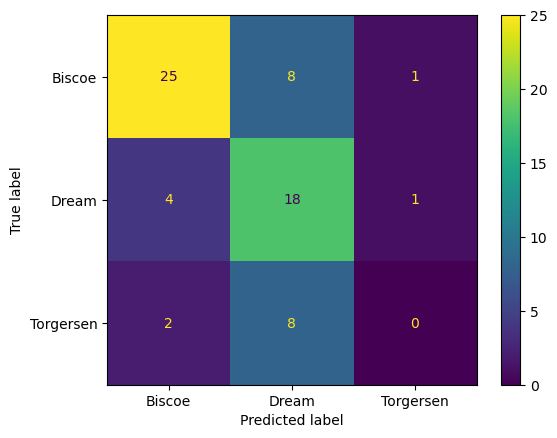

In [28]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=grid_model.classes_).plot()

In [29]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.81      0.74      0.77        34
       Dream       0.53      0.78      0.63        23
   Torgersen       0.00      0.00      0.00        10

    accuracy                           0.64        67
   macro avg       0.45      0.51      0.47        67
weighted avg       0.59      0.64      0.61        67



## Pipeline

In [30]:
X = df_pen.drop(['island'], axis = 1)
y = df_pen['island']

In [31]:
X = pd.get_dummies(X, drop_first=True)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=45)

## Pipeline Process

In [33]:
scaler = StandardScaler()

In [34]:
knn = KNeighborsClassifier()

In [35]:
operations = [('scaler',scaler),('knn',knn)]

In [36]:
from sklearn.pipeline import Pipeline

In [37]:
pipe = Pipeline(operations)

In [38]:
k_values = list(range(1,30))

In [39]:
param_grid = {'knn__n_neighbors': k_values}

In [40]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [41]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [42]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=18))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=18),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 18,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [43]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [44]:
pd.DataFrame(full_cv_classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003200,2.445420e-04,0.003101,4.897166e-04,1,{'knn__n_neighbors': 1},0.722222,0.698113,0.735849,0.792453,0.679245,0.725577,0.038704,21
1,0.002901,1.998190e-04,0.002800,2.446403e-04,2,{'knn__n_neighbors': 2},0.722222,0.735849,0.698113,0.735849,0.679245,0.714256,0.022281,28
2,0.002901,2.002478e-04,0.002800,2.449511e-04,3,{'knn__n_neighbors': 3},0.685185,0.754717,0.716981,0.754717,0.716981,0.725716,0.026372,18
3,0.002801,2.451652e-04,0.002900,1.998666e-04,4,{'knn__n_neighbors': 4},0.703704,0.773585,0.735849,0.754717,0.679245,0.729420,0.034090,14
4,0.002900,2.002242e-04,0.002901,2.000095e-04,5,{'knn__n_neighbors': 5},0.629630,0.679245,0.754717,0.754717,0.679245,0.699511,0.048580,29
5,0.002700,2.451464e-04,0.003001,5.955694e-07,6,{'knn__n_neighbors': 6},0.685185,0.735849,0.754717,0.792453,0.698113,0.733263,0.038775,6
6,0.002801,2.448150e-04,0.002800,2.452822e-04,7,{'knn__n_neighbors': 7},0.666667,0.754717,0.773585,0.735849,0.716981,0.729560,0.036673,12
7,0.002901,2.000333e-04,0.002801,3.999710e-04,8,{'knn__n_neighbors': 8},0.685185,0.754717,0.754717,0.773585,0.698113,0.733263,0.034910,6
8,0.003000,5.091228e-07,0.002501,3.504023e-07,9,{'knn__n_neighbors': 9},0.685185,0.716981,0.735849,0.754717,0.679245,0.714396,0.028919,27
9,0.002600,2.003671e-04,0.002900,2.000810e-04,10,{'knn__n_neighbors': 10},0.685185,0.716981,0.773585,0.773585,0.679245,0.725716,0.041137,16


In [45]:
y_pred = full_cv_classifier.predict(X_test)

In [46]:
metrics.accuracy_score(y_test,y_pred)

0.6417910447761194

In [47]:
metrics.confusion_matrix(y_test,y_pred)

array([[25,  8,  1],
       [ 4, 18,  1],
       [ 2,  8,  0]], dtype=int64)

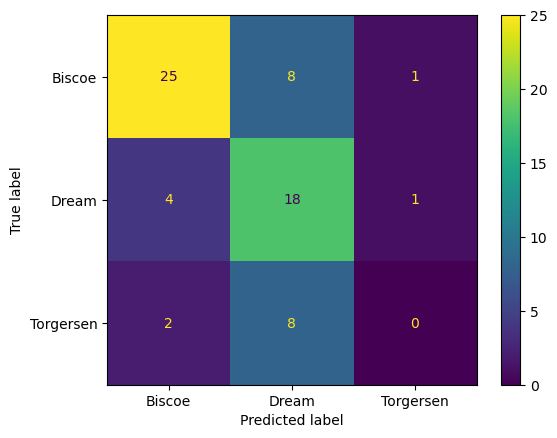

In [48]:
cm = metrics.confusion_matrix(y_test,y_pred)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=full_cv_classifier.classes_).plot()

In [49]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Biscoe       0.81      0.74      0.77        34
       Dream       0.53      0.78      0.63        23
   Torgersen       0.00      0.00      0.00        10

    accuracy                           0.64        67
   macro avg       0.45      0.51      0.47        67
weighted avg       0.59      0.64      0.61        67



## Final Model

In [50]:
scaler = StandardScaler()
knn9 = KNeighborsClassifier(n_neighbors=9)
operations = [('scaler',scaler),('knn9',knn9)]

In [51]:
pipe = Pipeline(operations)

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn9', KNeighborsClassifier(n_neighbors=9))])

In [53]:
pipe_pred = pipe.predict(X_test)

In [54]:
print(metrics.classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

      Biscoe       0.71      0.74      0.72        34
       Dream       0.52      0.52      0.52        23
   Torgersen       0.33      0.30      0.32        10

    accuracy                           0.60        67
   macro avg       0.52      0.52      0.52        67
weighted avg       0.59      0.60      0.59        67



In [55]:
single_sample = X_test.iloc[40]

In [56]:
pipe.predict(single_sample.values.reshape(1, -1))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Dream'], dtype=object)

In [57]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.44444444, 0.55555556, 0.        ]])